In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# trans 1,2 dichloro absorbance spectrum
cols = range(1,11) # skip first column (wavelenths)
tmp = np.genfromtxt('156-60-5-IR.jdx', usecols=cols, skip_header=25, comments="#")
yfactor=0.000196710  # from jcamp file header
A = np.hstack(tmp) * yfactor
Ttrans = 10**(-A)  # convert abs to %T

# header gives frequency spacing, min, and max
xtrans = np.linspace(450, 3966, len(Ttrans))
twoD = np.vstack((xtrans, Ttrans)).T
np.savetxt('trans-dichloroethene-IR.csv', twoD, delimiter=', ', fmt=['%d', '%.3f'], header='Converted from NIST Webbook 156-60-5-IR.jdx\ncm-1, transmittance')

In [3]:
# cis-1,2-dichloroethene %T spectrum
cols = range(1,6)
tmp = np.genfromtxt('156-59-2-IR.jdx', usecols=cols, skip_header=36, comments="#")
Tcis = tmp.flatten()
# header gives frequency, min, max
xcis = np.linspace(391, 3800, len(Tcis))
twoD = np.vstack((xcis, Tcis)).T
np.savetxt('cis-dichloroethene-IR.csv', twoD, delimiter=', ', fmt=['%d', '%.3f'],
           header='Converted from NIST Webbook 156-59-2-IR.jdx\ncm-1, transmittance')

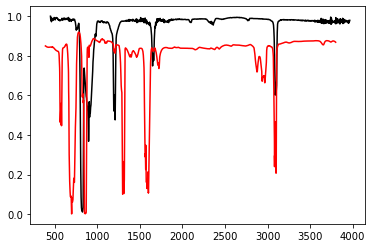

In [4]:
plt.plot(xtrans, Ttrans, color='k')
plt.plot(xcis, Tcis, color='r')
plt.show()